<a href="https://colab.research.google.com/github/Jeongmin0658/kentech_tutorial/blob/main/Version_2023_summer/hansu/3_%EB%81%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# We estimate pi using Monte Carlo, i.e., random sampling.

![Unknown.png](attachment:Unknown.png)


Think about how to estimate pi from the figure above, which we would like to generate through the Python code.

Further, we would like to statistical analysis of the estimation of pi, i.e., how the estimate converges towards the true pi as shown below.

![Unknown-1.png](attachment:Unknown-1.png)

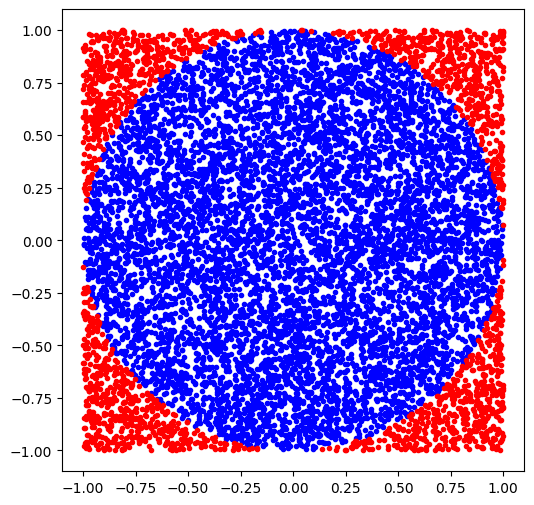

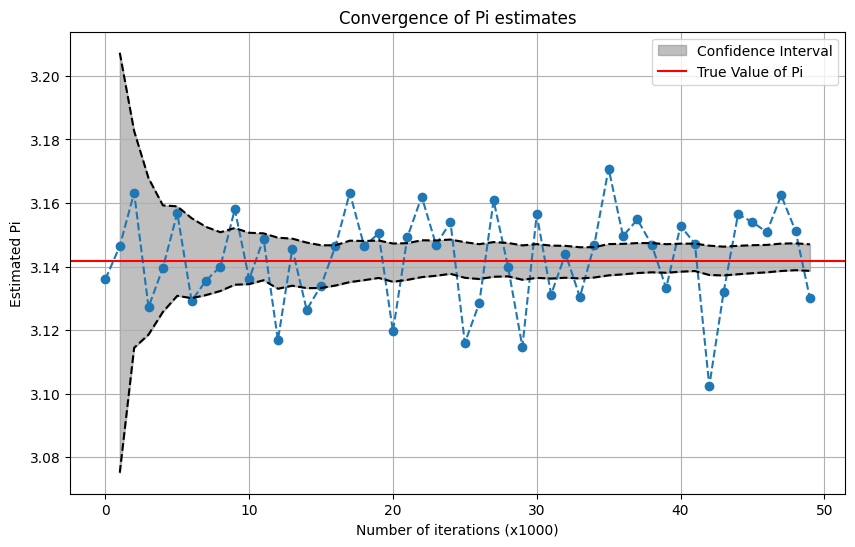

Final Estimated Pi: 3.1428
Final 95% Confidence Interval: (3.1386, 3.1470)


In [22]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

class MonteCarloPi:
    def __init__(self, num_points):
        self.num_points = num_points
        #self를 붙이는 거는 그 변수가 class 안에서 쭉 사용할 수 있도록 하는 거
        #즉, 다른 함수에서도 "self.num_points"를 입력한다면, 그 변수를 사용할 수 있는 거임


    def generate_points(self):
        """Generate random points within a square of length 2."""
        # EDIT!!!
        points = []
        x = np.random.uniform(-1, 1, self.num_points)
        y = np.random.uniform(-1,1, self.num_points)
        for i in range(0, self.num_points):
          points.append((x[i],y[i]))
        return np.array(points)

    def inside_circle(self, points):
        """Check if the points are within the unit circle."""
        # EDIT!!!
        c= []
        for i in range(0, len(points)):
          u = points[i][0]
          v = points[i][1]
          dis = u**2 +v**2
          if dis <=1:
            c.append(True)
          else:
            c.append(False)
        return np.array(c) #np.array 로 함으로써 나중에 np 계산이 편하게 됨

    def estimate_pi(self):
        """Estimate the value of pi using Monte Carlo method."""
        points = self.generate_points()
        inside = self.inside_circle(points)
        pi_estimate = 4*(sum(inside)/len(points))
        return pi_estimate, points, inside

    def confidence_interval(self, estimates, confidence=0.95):
        """Compute the confidence interval for the estimates."""
        mean = np.mean(estimates)
        se = stats.sem(estimates)
        # Understand the below
        ci = se * stats.t.ppf((1 + confidence) / 2, len(estimates) - 1)
        return mean, mean - ci, mean + ci

    def plot_points(self, points, inside):
        """Plot points and the unit circle, color points inside the circle."""
        plt.figure(figsize=(6,6))
        # Understand the below
        plt.scatter(points[inside, 0], points[inside, 1], color='b', marker='.')
        plt.scatter(points[~inside, 0], points[~inside, 1], color='r', marker='.')
        plt.gca().set_aspect('equal')
        plt.show()

    def plot_convergence(self, pi_estimates, lower_bounds, upper_bounds):
        """Plot the convergence of pi estimates and confidence interval."""
        plt.figure(figsize=(10, 6))
        plt.plot(pi_estimates, marker='o', linestyle='dashed')
        plt.plot(lower_bounds, color='black', linestyle='--')
        plt.plot(upper_bounds, color='black', linestyle='--')
        plt.fill_between(range(len(lower_bounds)), lower_bounds, upper_bounds, color='gray', alpha=0.5, label='Confidence Interval')
        plt.axhline(np.pi, color='red', label='True Value of Pi')
        plt.xlabel('Number of iterations (x1000)')
        plt.ylabel('Estimated Pi')
        plt.title('Convergence of Pi estimates')
        plt.legend()
        plt.grid(True)
        plt.show()


    def run_simulation(self, num_iterations):
        """Run the Monte Carlo simulation and analyze the results."""
        #initialized
        pi_estimates = []
        lower_bounds = []
        upper_bounds = []

        for _ in range(num_iterations): #변수가 _라는 건 변수에 따라 메모리를 쓰지 않겠다는 얘기
            pi_estimate, points, inside = self.estimate_pi()
            pi_estimates.append(pi_estimate)

            # Compute confidence interval after each estimate and store bounds
            mean, lower, upper = self.confidence_interval(pi_estimates)
            lower_bounds.append(lower)
            upper_bounds.append(upper)

        self.plot_points(points, inside)
        self.plot_convergence(pi_estimates, lower_bounds, upper_bounds)
        print(f"Final Estimated Pi: {mean:.4f}")
        print(f"Final 95% Confidence Interval: ({lower:.4f}, {upper:.4f})")

# Usage:
# Create an instance of the MonteCarloPi class
mc = MonteCarloPi(num_points=10000)
# Run the simulation
mc.run_simulation(num_iterations=50)


In [19]:
import numpy as np
def gp(num_points):
  x = np.random.uniform(-1, 1, num_points)
  y = np.random.uniform(-1,1, num_points)
  return x, y

def ic(x, y):
  c = 0
  for i in range(0, len(x)):
    d = distance((x[i],y[i]))
    if d <=1:
      c+=1
  return c

def ep(c, num_points):
  pi = 4*(c/num_points)
  return pi

def distance(p1):
    return np.sqrt((p1[0])**2 + (p1[1])**2)
num_points = 1000000
x, y=gp(num_points)
cc =  ic(x, y)
pi = ep(cc, num_points)
print(pi)

3.141664


/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:256: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


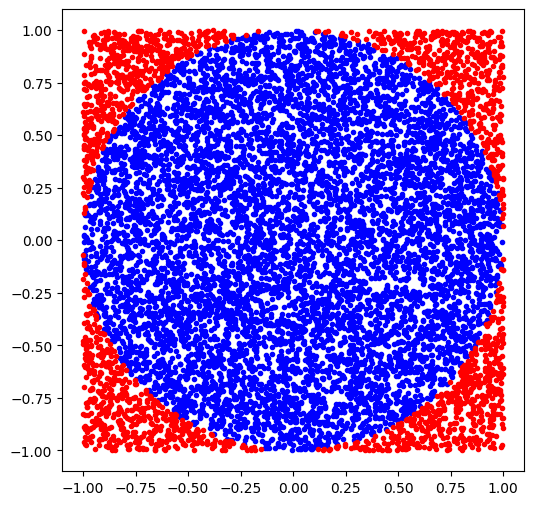

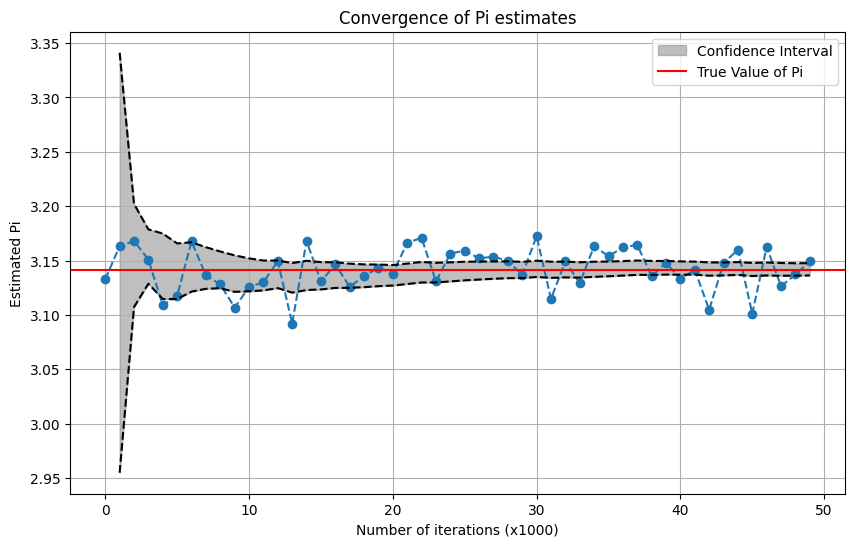

Final Estimated Pi: 3.1420
Final 95% Confidence Interval: (3.1363, 3.1476)


In [23]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

class MonteCarloPi:
    def __init__(self, num_points):
        self.num_points = num_points
        #self를 붙이는 거는 그 변수가 class 안에서 쭉 사용할 수 있도록 하는 거
        #즉, 다른 함수에서도 "self.num_points"를 입력한다면, 그 변수를 사용할 수 있는 거임


    def generate_points(self):
        """Generate random points within a square of length 2."""
        # EDIT!!!
        points = []
        x = np.random.uniform(-1, 1, self.num_points)
        y = np.random.uniform(-1,1, self.num_points)
        for i in range(0, self.num_points):
          points.append((x[i],y[i]))
        return np.array(points)

    def inside_circle(self, points):
        """Check if the points are within the unit circle."""
        # EDIT!!!
        c= []
        for i in range(0, len(points)):
          u = points[i][0]
          v = points[i][1]
          dis = u**2 +v**2
          if dis <=1:
            c.append(True)
          else:
            c.append(False)
        return np.array(c) #np.array 로 함으로써 나중에 np 계산이 편하게 됨

    def estimate_pi(self):
        """Estimate the value of pi using Monte Carlo method."""
        points = self.generate_points()
        inside = self.inside_circle(points)
        pi_estimate = 4*(sum(inside)/len(points))
        return pi_estimate, points, inside

    def confidence_interval(self, estimates, confidence=0.95):
        """Compute the confidence interval for the estimates."""
        mean = np.mean(estimates)
        se = stats.sem(estimates)
        # Understand the below
        ci = se * stats.t.ppf((1 + confidence) / 2, len(estimates) - 1)
        return mean, mean - ci, mean + ci

    def plot_points(self, points, inside):
        """Plot points and the unit circle, color points inside the circle."""
        plt.figure(figsize=(6,6))
        # Understand the below
        plt.scatter(points[inside, 0], points[inside, 1], color='b', marker='.')
        plt.scatter(points[~inside, 0], points[~inside, 1], color='r', marker='.')
        plt.gca().set_aspect('equal')
        plt.show()

    def plot_convergence(self, pi_estimates, lower_bounds, upper_bounds):
        """Plot the convergence of pi estimates and confidence interval."""
        plt.figure(figsize=(10, 6))
        plt.plot(pi_estimates, marker='o', linestyle='dashed')
        plt.plot(lower_bounds, color='black', linestyle='--')
        plt.plot(upper_bounds, color='black', linestyle='--')
        plt.fill_between(range(len(lower_bounds)), lower_bounds, upper_bounds, color='gray', alpha=0.5, label='Confidence Interval')
        plt.axhline(np.pi, color='red', label='True Value of Pi')
        plt.xlabel('Number of iterations (x1000)')
        plt.ylabel('Estimated Pi')
        plt.title('Convergence of Pi estimates')
        plt.legend()
        plt.grid(True)
        plt.show()


    def run_simulation(self, num_iterations):
        """Run the Monte Carlo simulation and analyze the results."""
        #initialized
        pi_estimates = []
        lower_bounds = []
        upper_bounds = []

        for _ in range(num_iterations): #변수가 _라는 건 변수에 따라 메모리를 쓰지 않겠다는 얘기
            pi_estimate, points, inside = self.estimate_pi()
            pi_estimates.append(pi_estimate)

            # Compute confidence interval after each estimate and store bounds
            mean, lower, upper = self.confidence_interval(pi_estimates)
            lower_bounds.append(lower)
            upper_bounds.append(upper)

        self.plot_points(points, inside)
        self.plot_convergence(pi_estimates, lower_bounds, upper_bounds)
        print(f"Final Estimated Pi: {mean:.4f}")
        print(f"Final 95% Confidence Interval: ({lower:.4f}, {upper:.4f})")

# Usage:
# Create an instance of the MonteCarloPi class
mc = MonteCarloPi(num_points=10000)
# Run the simulation
mc.run_simulation(num_iterations=50)
